**Import Libraries**

In [24]:
import math
import datetime as dt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows', 500)

**Read csv file**

In [25]:
df = pd.read_csv('./measurement_problems/datasets/movies_metadata.csv', low_memory=False)

In [26]:
df = df[['title', 'vote_average', 'vote_count']]

In [27]:
df.head()

,title,vote_average,vote_count
0,Toy Story,7.7,5415.0
1,Jumanji,6.9,2413.0
2,Grumpier Old Men,6.5,92.0
3,Waiting to Exhale,6.1,34.0
4,Father of the Bride Part II,5.7,173.0


In [28]:
df.shape

(45466, 3)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote_average,45460.0,5.618207,1.924216,0.0,5.0,6.0,6.8,10.0
vote_count,45460.0,109.897338,491.310374,0.0,3.0,10.0,34.0,14075.0


# Type 1: IMDB Movie Scoring and Sorting

**Sort dataframe by vote_average**

In [30]:
df.sort_values('vote_average', ascending=False).head(20)

,title,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,10.0,1.0
15710,If God Is Willing and da Creek Don't Rise,10.0,1.0
22396,Meat the Truth,10.0,1.0
22395,Marvin Hamlisch: What He Did For Love,10.0,1.0
35343,Elaine Stritch: At Liberty,10.0,1.0
186,Reckless,10.0,1.0
45047,The Human Surge,10.0,1.0
22377,The Guide,10.0,1.0
22346,هیچ کجا هیچ کس,10.0,1.0
1634,Other Voices Other Rooms,10.0,1.0


**Calculate the vote_count_score by MinMaxScaler**

In [31]:
df['vote_count_score'] = MinMaxScaler(feature_range=(1, 10)).fit(df[['vote_count']]).transform(df[['vote_count']])

In [32]:
df.head()

,title,vote_average,vote_count,vote_count_score
0,Toy Story,7.7,5415.0,4.462522
1,Jumanji,6.9,2413.0,2.542948
2,Grumpier Old Men,6.5,92.0,1.058828
3,Waiting to Exhale,6.1,34.0,1.021741
4,Father of the Bride Part II,5.7,173.0,1.110622


**Calculate average_count_score**

average_count_score = vote_average x vote_count_score

In [33]:
df['average_count_score'] = df['vote_average'] * df['vote_count_score']

In [34]:
df.head()

,title,vote_average,vote_count,vote_count_score,average_count_score
0,Toy Story,7.7,5415.0,4.462522,34.361421
1,Jumanji,6.9,2413.0,2.542948,17.546345
2,Grumpier Old Men,6.5,92.0,1.058828,6.882380
3,Waiting to Exhale,6.1,34.0,1.021741,6.232618
4,Father of the Bride Part II,5.7,173.0,1.110622,6.330544


**Sort by average_count_score**

In [35]:
df.sort_values('average_count_score', ascending=False).head(20)

,title,vote_average,vote_count,vote_count_score,average_count_score
15480,Inception,8.1,14075.0,10.000000,81.000000
12481,The Dark Knight,8.3,12269.0,8.845187,73.415048
22879,Interstellar,8.1,11187.0,8.153321,66.041904
17818,The Avengers,7.4,12000.0,8.673179,64.181528
14551,Avatar,7.2,12114.0,8.746075,62.971737
26564,Deadpool,7.4,11444.0,8.317655,61.550650
2843,Fight Club,8.3,9678.0,7.188419,59.663879
20051,Django Unchained,7.8,10297.0,7.584227,59.156973
23753,Guardians of the Galaxy,7.9,10014.0,7.403268,58.485819
292,Pulp Fiction,8.3,8670.0,6.543872,54.314139


# Type 2: IMDB Weighted Rating

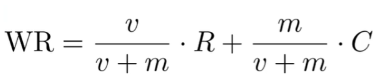

* R = vote average
* v = vote count
* m = minumum votes required to be listed in the top 250
* C = the mean vote across the whole report (currently 7.0)

In [40]:
m = 2500

In [41]:
def weighted_rating(v, m, R, C):
    return ((v / (v + m)) * R) + ((m / (v + m)) * C)

In [42]:
df['weighted_rating'] = weighted_rating(df['vote_count'], m=M, R=df['vote_average'], C=df['vote_average'].mean())

**Sort by weighted_rating**

In [45]:
df.sort_values('weighted_rating', ascending=False).head(10)

,title,vote_average,vote_count,vote_count_score,average_count_score,weighted_rating
12481,The Dark Knight,8.3,12269.0,8.845187,73.415048,7.846044
314,The Shawshank Redemption,8.5,8358.0,6.344369,53.927140,7.836482
2843,Fight Club,8.3,9678.0,7.188419,59.663879,7.749460
15480,Inception,8.1,14075.0,10.000000,81.000000,7.725672
292,Pulp Fiction,8.3,8670.0,6.543872,54.314139,7.699778
834,The Godfather,8.5,6024.0,4.851936,41.241456,7.654800
22879,Interstellar,8.1,11187.0,8.153321,66.041904,7.646688
351,Forrest Gump,8.2,8147.0,6.209449,50.917485,7.593775
7000,The Lord of the Rings: The Return of the King,8.1,8226.0,6.259964,50.705712,7.521547
4863,The Lord of the Rings: The Fellowship of the Ring,8.0,8892.0,6.685826,53.486607,7.477310


# Type 3: Bayesian Average Rating Score

In [46]:
def bayesian_average_rating_score(n, confidence=0.95):
    
    if sum(n) == 0:
        return 0
    
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K +1))
    
    return score

In [52]:
df2 = pd.read_csv('./measurement_problems/datasets/imdb_ratings.csv')
df2 = df2.iloc[0:, 1:]
df2.head()

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one
0,111161,1. The Shawshank Redemption (1994),9.2,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733
1,68646,2. The Godfather (1972),9.1,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128
2,71562,3. The Godfather: Part II (1974),9.0,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469
3,468569,4. The Dark Knight (2008),9.0,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345
4,50083,5. 12 Angry Men (1957),8.9,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318


In [54]:
df2['bayesian_score'] = df2.apply(lambda x: bayesian_average_rating_score(x[['one', 
                                                     'two', 
                                                     'three', 
                                                     'four', 
                                                     'five',
                                                     'six',
                                                     'seven',
                                                     'eight',
                                                     'nine',
                                                     'ten']]), axis=1)

In [56]:
df2.sort_values('bayesian_score', ascending=False)

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one,bayesian_score
0,111161,1. The Shawshank Redemption (1994),9.2,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733,9.145389
1,68646,2. The Godfather (1972),9.1,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128,8.940016
3,468569,4. The Dark Knight (2008),9.0,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345,8.895962
2,71562,3. The Godfather: Part II (1974),9.0,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469,8.812499
4,50083,5. 12 Angry Men (1957),8.9,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318,8.767934
6,167260,7. The Lord of the Rings: The Return of ...,8.9,703093,433087,270113,117411,44760,21818,10873,7987,6554,28990,8.752038
5,108052,6. Schindler's List (1993),8.9,453906,383584,220586,82367,27219,12922,6234,4572,4289,19328,8.743609
11,109830,12. Forrest Gump (1994),8.8,622104,553654,373644,151284,51140,22720,11692,7647,5941,12110,8.699152
12,1375666,13. Inception (2010),8.7,724798,627987,408686,174229,60668,26910,13436,8703,6932,17621,8.693148
10,137523,11. Fight Club (1999),8.8,637087,572654,371752,152295,53059,24755,12648,8606,6948,17435,8.674475
